# 1 - Presentation

In [1]:
myData <- read.table(file="bats.csv", sep=";", skip=3, header=T)
names(myData)

[1] "Species" "Diet"    "Clade"   "BOW"     "BRW"     "AUD"     "MOB"    
[8] "HIP"

# 2 - Study of the relationship between brain weight and body mass

In [2]:
library(ggplot2)
library(tidyverse)
library(corrplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
corrplot 0.92 loaded



In [3]:
phyto=myData[(myData$Diet==1),]

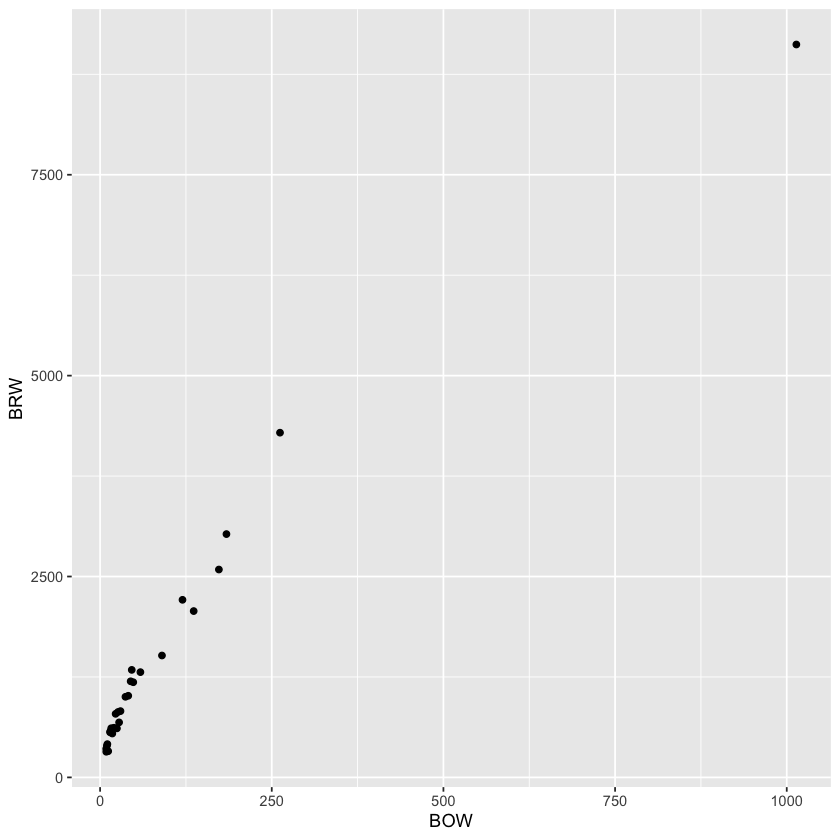

In [4]:
ggplot(data = phyto, aes(x = BOW, y=BRW)) + geom_point()

In [5]:
reg1 = lm(BRW ~ BOW, data=phyto)

In [6]:
summary(reg1)


Call:
lm(formula = BRW ~ BOW, data = phyto)

Residuals:
    Min      1Q  Median      3Q     Max 
-628.32 -233.94  -65.74  158.26 1308.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 623.4469    81.4762   7.652 3.14e-08 ***
BOW           8.9999     0.3972  22.659  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 396.9 on 27 degrees of freedom
Multiple R-squared:   0.95,	Adjusted R-squared:  0.9482 
F-statistic: 513.4 on 1 and 27 DF,  p-value: < 2.2e-16


In [7]:
# formula = 9 * BOW + 623

- <b>What is the estimate of the intercept? :</b> 623
- <b>What is the value of the test statistics for the model test? :</b> < 2e-16 it means that BOW is an actual influence
- <b>What is the H0 hypothesis of this test?:</b> If BOW is equal to 0. However, based on the non zero p value, we are confident that my value is not equal to 0
- <b>What can be said about the relationship between brain weight and body mass? :</b> linearly proportional
- <b>How much is the coefficient of determination?:</b> Multiple R-squared:   0.95

In [8]:
anova(reg1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
BOW,1,80888380,80888379.9,513.4154,4.208907e-19
Residuals,27,4253838,157549.6,NA,NA


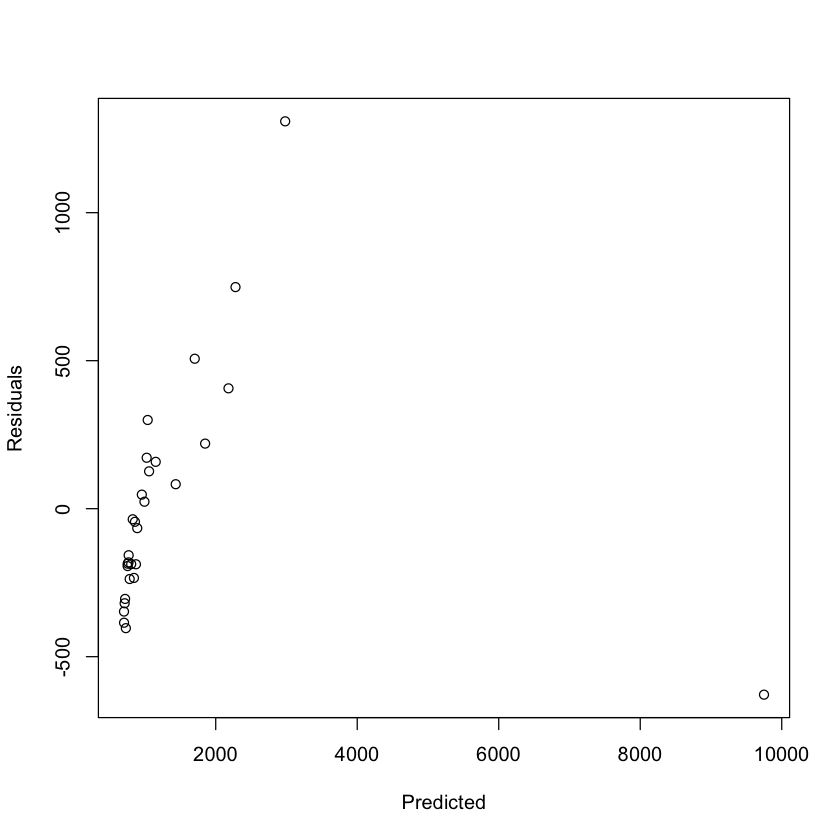

In [9]:
plot(reg1$fitted.values, reg1$residuals, xlab="Predicted", ylab="Residuals")

<span style="color:green">We notice that in this graph, there are no outliers. So the data is not faulty anymore. 97% accuracy</span>

[1] 7


Call:
lm(formula = BRW ~ BOW, data = phytobis)

Residuals:
    Min      1Q  Median      3Q     Max 
-269.76  -93.33    8.73  112.93  322.55 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 346.5452    35.4920   9.764 3.48e-10 ***
BOW          14.5099     0.4285  33.860  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 141.8 on 26 degrees of freedom
Multiple R-squared:  0.9778,	Adjusted R-squared:  0.977 
F-statistic:  1147 on 1 and 26 DF,  p-value: < 2.2e-16


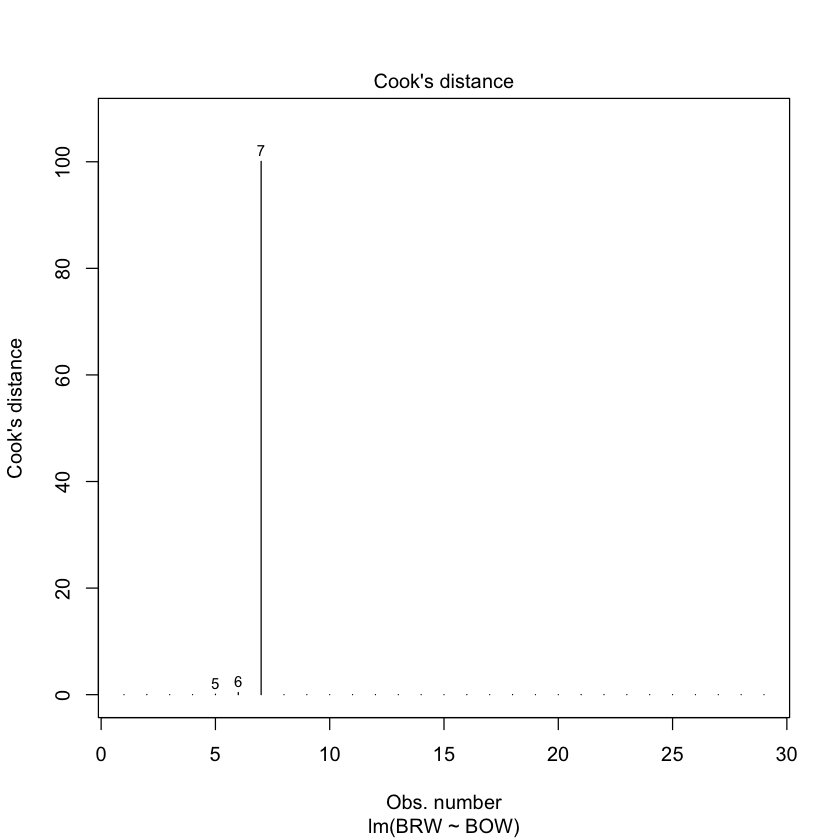

In [10]:
plot(reg1,4)
which(phyto$BRW>8000)
phytobis=phyto[which(phyto$BRW<8000),]
reg2 = lm(BRW ~ BOW, data=phytobis)
summary(reg2)

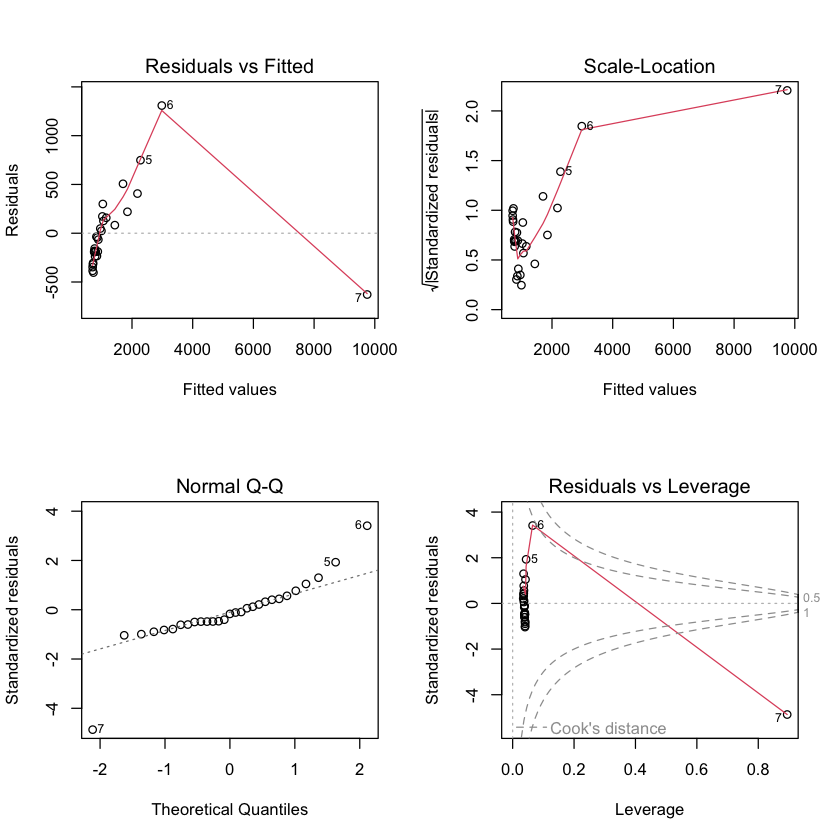

In [11]:
par(mfcol=c(2,2))
plot(reg1)

# 3 - Study of the contribution to the total weight of each part of the brain

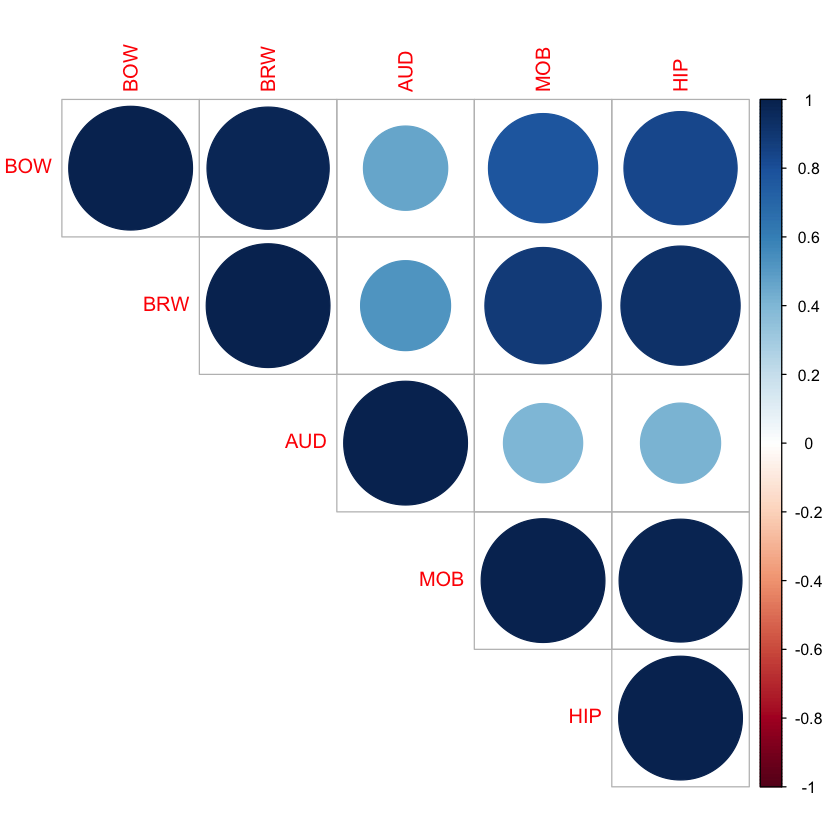

In [12]:
phytoNum=phyto[, c(4:8)]
mat.cor=cor(phytoNum)
corrplot(mat.cor, type="upper")

In [13]:
cor.test(phyto$BRW,phyto$HIP)
cor.test(phyto$BRW,phyto$MOB)
cor.test(phyto$BRW,phyto$AUD)


	Pearson's product-moment correlation

data:  phyto$BRW and phyto$HIP
t = 12.91, df = 27, p-value = 4.574e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8502663 0.9658107
sample estimates:
      cor 
0.9276811 



	Pearson's product-moment correlation

data:  phyto$BRW and phyto$MOB
t = 9.7964, df = 27, p-value = 2.203e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7644185 0.9442114
sample estimates:
      cor 
0.8834215 



	Pearson's product-moment correlation

data:  phyto$BRW and phyto$AUD
t = 3.2338, df = 27, p-value = 0.003215
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2007495 0.7497021
sample estimates:
      cor 
0.5283792 


<span style="color:green">- We can conclude that BRW has the highest correlation with HIP and lowest with AUD</span>

In [14]:
regm=lm(BRW~AUD+MOB+HIP,data=phytobis)
summary(regm)
anova(regm)


Call:
lm(formula = BRW ~ AUD + MOB + HIP, data = phytobis)

Residuals:
    Min      1Q  Median      3Q     Max 
-268.55  -68.84    9.88   61.66  375.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -312.692     76.628  -4.081  0.00043 ***
AUD           47.989      6.067   7.910 3.85e-08 ***
MOB           -2.444      3.257  -0.750  0.46034    
HIP           15.981      2.960   5.399 1.52e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 158.5 on 24 degrees of freedom
Multiple R-squared:  0.9744,	Adjusted R-squared:  0.9712 
F-statistic: 304.5 on 3 and 24 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
AUD,1,6817133.4,6817133.42,271.20969,1.397093e-14
MOB,1,15409397.1,15409397.05,613.04035,1.341315e-18
HIP,1,732652.6,732652.61,29.14751,1.519221e-05
Residuals,24,603264.6,25136.02,NA,NA


- What can be said about the relationship between total brain mass and these three variables?
Good things.
- What is the coefficient associated with each variable?

- Discuss the relevance of the coefficient associated with the variable MOB.


In [15]:
reg0 = lm(BRW ~ 1, data = phytobis)
step(reg0, scope=BRW~AUD + MOB + HIP, direction="forward")

Start:  AIC=384
BRW ~ 1

       Df Sum of Sq      RSS    AIC
+ HIP   1  21373972  2188475 319.46
+ MOB   1  20539668  3022780 328.51
+ AUD   1   6817133 16745314 376.44
<none>              23562448 384.00

Step:  AIC=319.46
BRW ~ HIP

       Df Sum of Sq     RSS    AIC
+ AUD   1   1571059  617417 286.03
<none>              2188475 319.46
+ MOB   1     12335 2176140 321.30

Step:  AIC=286.03
BRW ~ HIP + AUD

       Df Sum of Sq    RSS    AIC
<none>              617417 286.03
+ MOB   1     14152 603265 287.38



Call:
lm(formula = BRW ~ HIP + AUD, data = phytobis)

Coefficients:
(Intercept)          HIP          AUD  
    -277.68        13.80        47.96  


- What is its purpose ? what is the conclusion ?

<span style="color:green">
    The step function is a generic function selects a model by different criteria in a stepwise algorithm 
    Forward will add variables at every step. 
</span>

# 4 - Link between volume of the auditory part and diet

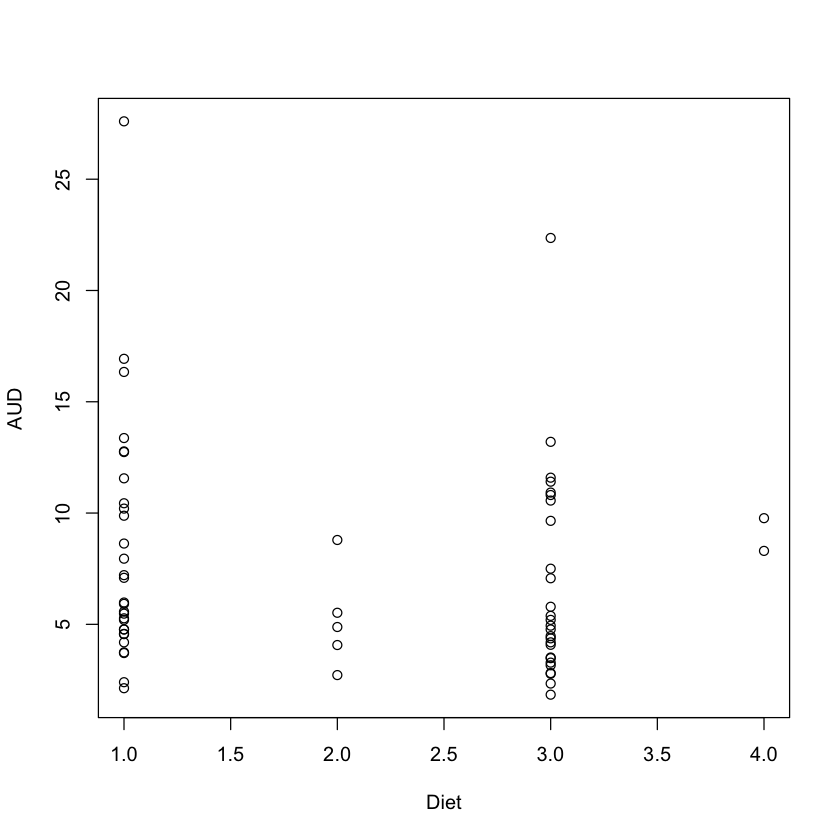

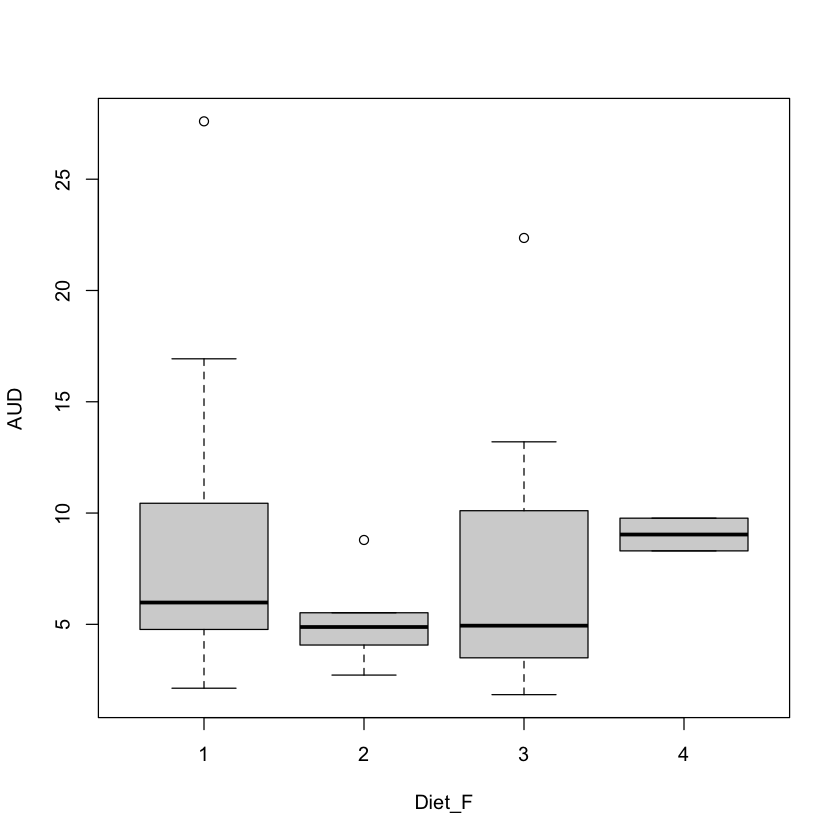

In [16]:
myData$Diet_F = as.factor(myData$Diet)
with(myData, plot(AUD~Diet))
with(myData, plot(AUD~Diet_F))

In [17]:
lm = lm(AUD~Diet_F, data=myData)
anova(lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Diet_F,3,66.06941,22.02314,0.9292727,0.4323339
Residuals,59,1398.26034,23.69933,NA,NA


- What can we conclude about the relationship linking auditory brain volume and diet? Is it surprising?
<span style="color:green">
    The results clearly show that there is no direct link between auditory brain volume and diet hence proving that the litterature we were provided with is false.
</span>